#PRACTICAL SESSION 1

**PART I LINEAR REGRESSION**

STEP 1: Importing the libraries

In [1]:
# Important libraries
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import linprog
import data_analysis as da

STEP 2: Load and preprocess the data

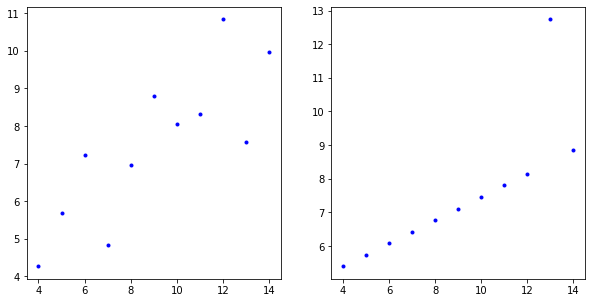

In [2]:
# Lets create a object data and plot it
data1 = da.Data('Anscombe_quartet_data1.csv')
data2 = da.Data('Anscombe_quartet_data3.csv')
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
data1.plotData()
plt.subplot(1,2,2)
data2.plotData()
plt.show()

STEP 3: Solving L2 norm

In [3]:
# Define a function that given a matrix "data" with two columns and the dregree of data augmentation "d" returns: a vector of parameters "beta",
# the matrix "X" of independent variables with dimension (m,d+1), and the matrix of predictions Y. 
def buildmodel(data,d):
  beta = np.zeros(d+1,)
  X    = np.ones((data.shape[0],d+1))
  cont = 0
  for i in range(1,d+1):
    X[:,i] = data[:,0]**(i)
  Y        = data[:,1]
  return beta,X,Y

In [4]:
# Use the previous function to create your matrices beta Xtr and Ytr for d = 1 for the first dataset and check their shapes
d = 1
beta1,Xtr1,Ytr1 = buildmodel(data1.X,d)
print(f'Shapes\nBeta: {beta1.shape}\nXtr: {Xtr1.shape}\nYtr: {Ytr1.shape}')

Shapes
Beta: (2,)
Xtr: (11, 2)
Ytr: (11,)


In [5]:
# Repeat it for the second dataset
d = 1
beta2,Xtr2,Ytr2 = buildmodel(data2.X,d)
print(f'Shapes\nBeta: {beta2.shape}\nXtr: {Xtr2.shape}\nYtr: {Ytr2.shape}')

Shapes
Beta: (2,)
Xtr: (11, 2)
Ytr: (11,)


In [6]:
# Define a function that given X & Y as inputs returns the analytical solution of the L2 norm
def analyticL2(X,Y):
  beta = np.linalg.inv(X.T@X)@(X.T@Y).T
  return beta

In [7]:
# Use the previous function to obtain the optimum beta for Xtr and Ytr for both datasets and print the values
beta1 = analyticL2(Xtr1,Ytr1)
beta2 = analyticL2(Xtr2,Ytr2)
print(f'Optimum beta1 {beta1}\nOptimum beta2 {beta2}')

Optimum beta1 [3.00009091 0.50009091]
Optimum beta2 [3.00245455 0.49972727]


In [8]:
# This function plots the regression
def plotSolution(X,beta,d):
  aux = np.zeros((50,X.shape[1]))
  aux[:,0] = np.linspace(np.amin(X[:,1]),np.amax(X[:,1]),50)
  _,xplot,_ = buildmodel(aux,d)
  yplot = xplot@beta
  plt.plot(xplot[:,1],yplot,'k')

# This function computes the error for the train and test sets
def computeErrors(beta,Xtr,Ytr,Xte,Yte):
  training_err = np.mean((Ytr - Xtr@beta)**2)
  test_err = np.mean((Yte - Xte@beta)**2)
  return training_err,test_err

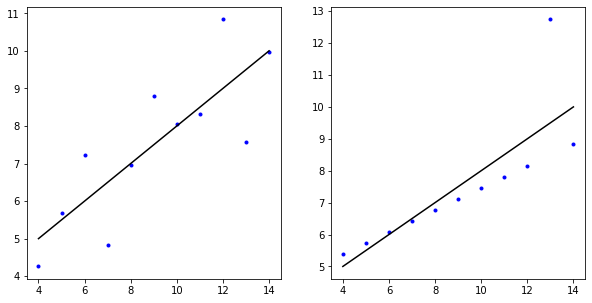

In [9]:
# We will plot both solutions side to side
d = 1
plt.figure(figsize = (10,5))
# Anscombe1
plt.subplot(1,2,1)
data1.plotData()
plotSolution(Xtr1,beta1,d)

# Anscombe3
plt.subplot(1,2,2)
data2.plotData()
plotSolution(Xtr2,beta2,d)
plt.show()

STEP 4: Solving L1 and Linf norms

In [10]:
# Define two functions that given the parameters from Ax = b, return the coefficients of the variables (c), the left coefficients for the
# restrictions (lhs_ineq), and the right coefficients for the restrictions (rhs_ineq)
# We are preparing the matrices for the linprog function (Read documentation on linprog)

def L1linprog(x,A,b):
  cx = np.zeros((A.shape[1],))
  ct = np.ones((A.shape[0],))
  c  = np.concatenate((cx,ct))
  aux1 = np.concatenate((A,-np.identity(A.shape[0])),axis = 1)
  aux2 = np.concatenate((-A,-np.identity(A.shape[0])),axis = 1)
  lhs_ineq = np.concatenate((aux1,aux2),axis = 0)
  rhs_ineq = np.concatenate((b,-b),axis = 0)
  return c,lhs_ineq,rhs_ineq

def Linfprog(x,A,b):
  cx = np.zeros((A.shape[1],))
  ct = np.ones((1,))
  c  = np.concatenate((cx,ct))
  aux1 = np.concatenate((A,-np.ones((A.shape[0],1))),axis = 1)
  aux2 = np.concatenate((-A,-np.ones((A.shape[0],1))),axis = 1)
  lhs_ineq = np.concatenate((aux1,aux2),axis = 0)
  rhs_ineq = np.concatenate((b,-b),axis = 0)
  return c,lhs_ineq,rhs_ineq

In [11]:
# We build the model again with the second dataset and obtain the solutions for L1 and Linf
d = 1
beta,Xtr,Ytr = buildmodel(data2.X,d)

#L1
c,lhs_ineq,rhs_ineq = L1linprog(beta,Xtr,Ytr)
print(f'C1 shape {c.shape}, lhs1 shape {lhs_ineq.shape}, rsh1 shape {rhs_ineq.shape}\n')
sol = linprog(c=c, A_ub=lhs_ineq, b_ub=rhs_ineq)
betaL1 = sol.x[0:len(beta)]

#Linf
c,lhs_ineq,rhs_ineq = Linfprog(beta,Xtr,Ytr)
print(f'CInf shape {c.shape}, lhsInf shape {lhs_ineq.shape}, rshInf shape {rhs_ineq.shape}\n')
sol = linprog(c=c, A_ub=lhs_ineq, b_ub=rhs_ineq)
betaLinf = sol.x[0:len(beta)]

C1 shape (13,), lhs1 shape (22, 13), rsh1 shape (22,)

CInf shape (3,), lhsInf shape (22, 3), rshInf shape (22,)



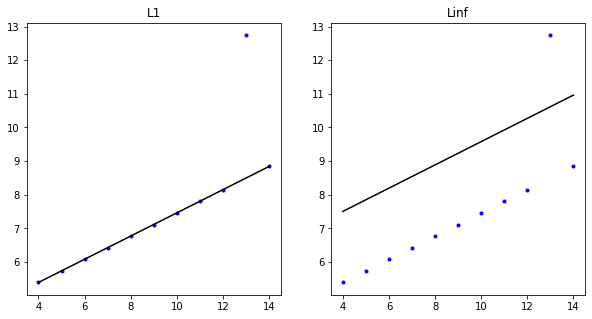

In [12]:
# Finally we plot the solutions obtained with these two norms
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
plt.title('L1')
data2.plotData()
plotSolution(Xtr,betaL1,d)
plt.subplot(1, 2, 2)
plt.title('Linf')
data2.plotData()
plotSolution(Xtr,betaLinf,d)
plt.show()

***PART II Regularization***

STEP 5: Visualization of underfitting and overfitting



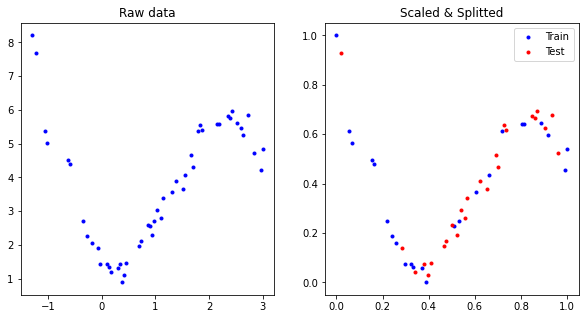

In [13]:
# We load the cubic data, and plot the data after scaling it and splitting it
cubic = da.Data('P1_cubic.csv')
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Raw data')
cubic.plotData()
plt.subplot(1,2,2)
plt.title('Scaled & Splitted')
cubic.scale()
cubic.splitData(0.5)
cubic.plotData()
plt.show()

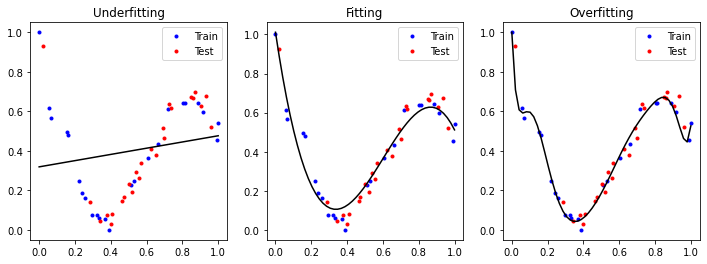

In [14]:
# Fit three models with polynomial degree of 1 (underfitting), 3 (fitting), 10 (overfitting).
# Hint1: Use build model to create the proper matrices
# Hint2: Use analyticL2 to obatin the obtimum parameters

d = 1
beta,Xtr,Ytr = buildmodel(cubic.Xtrain,d)
beta         = analyticL2(Xtr,Ytr)
plt.figure(figsize = (12,4))
plt.subplot(1, 3, 1)
plt.title('Underfitting')
cubic.plotData()
plotSolution(Xtr,beta,d)

d = 3
beta,Xtr,Ytr = buildmodel(cubic.Xtrain,d)
beta         = analyticL2(Xtr,Ytr)
plt.subplot(1, 3, 2)
plt.title('Fitting')
cubic.plotData()
plotSolution(Xtr,beta,d)

d = 10
beta,Xtr,Ytr = buildmodel(cubic.Xtrain,d)
beta         = analyticL2(Xtr,Ytr)
plt.subplot(1, 3, 3)
plt.title('Overfitting')
cubic.plotData()
plotSolution(Xtr,beta,d)
plt.show()

STEP 6: Applying L2 regularization

In [15]:
# Define a function that given X, Y and l as inputs returns the analytical solution of the regularized L2 norm
def analyticL2regularized(X,Y,l):
  beta  = np.linalg.inv(X.T@X+l*np.identity(X.shape[1]))@(X.T@Y).T
  return beta

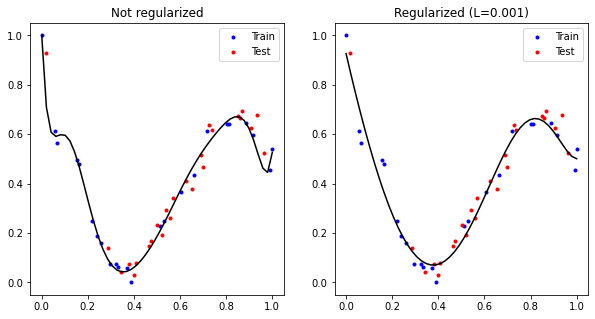

In [16]:
# Use analyticL2 and analyticL2regularized to obtain the optimum parameters and plot the regression for both cases
# Hint: Regularize with lambda = 0.0001

d = 10
beta,Xtr,Ytr = buildmodel(cubic.Xtrain,d)
plt.figure(figsize = (10,5))

# Non regularized
beta = analyticL2(Xtr,Ytr)
plt.subplot(1,2,1)
plt.title('Not regularized')
cubic.plotData()
plotSolution(Xtr,beta,d)

# Regularized
l = 0.0001
beta = analyticL2regularized(Xtr,Ytr,l)
plt.subplot(1,2,2)
plt.title('Regularized (L=0.001)')
cubic.plotData()
plotSolution(Xtr,beta,d)
plt.show()

**PART III Analysis**

STEP 7: Analyzing *lambda* with different test ratios




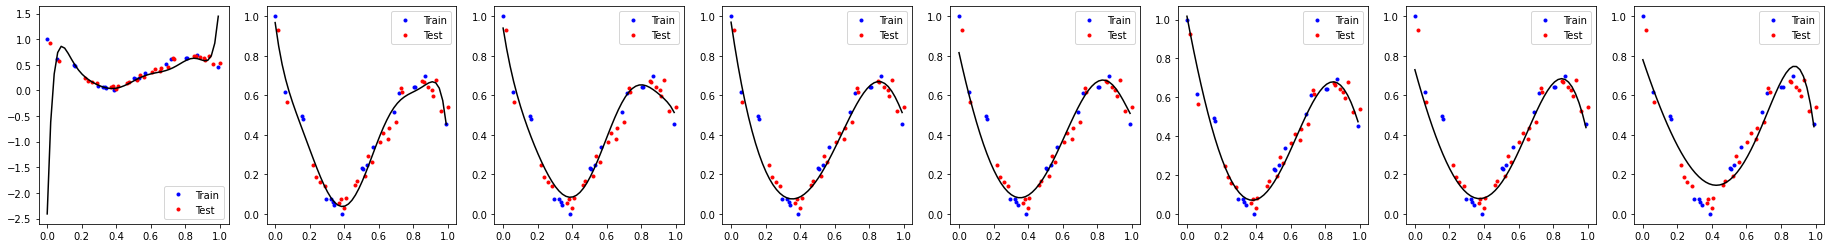

In [17]:
# It is possible to create a loop to iterate for different lambdas and find the optimal one using the test set

data = da.Data('P1_cubic.csv')
data.scale()
d = 10
l = np.array([0,10**(-8),10**(-7),10**(-6),10**(-5),10**(-4),10**(-3),10**(-2)])
tr = np.array([0.2,0.4,0.6])
iter = 200
HIST = []
Etr = np.zeros((len(l),len(tr)))
Ete = np.zeros((len(l),len(tr)))
EtrSD = np.zeros((len(l),len(tr)))
EteSD = np.zeros((len(l),len(tr)))

for j in range(len(tr)):
  data.splitData(tr[j])
  beta,_,_ = buildmodel(data.Xtrain,d)
  betaAUX = np.zeros((len(beta),len(l)))

  for i in range(len(l)): 
    auxtr = np.zeros((iter,))
    auxte = np.zeros((iter,))
    mask = np.ones((iter,),dtype=int)
    for k in range(iter):
      data.splitData(tr[j])
      _,Xtr,Ytr = buildmodel(data.Xtrain,d)
      _,Xte,Yte = buildmodel(data.Xtest,d)
      betaAUX[:,i]      = analyticL2regularized(Xtr,Ytr,l[i])
      auxtr[k],auxte[k] = computeErrors(betaAUX[:,i],Xtr,Ytr,Xte,Yte)
    Etr[i,j] = np.nanmean(auxtr)
    Ete[i,j] = np.nanmean(auxte)
    EtrSD[i,j] = np.std(auxtr)
    EteSD[i,j] = np.std(auxte)
  HIST.append(betaAUX)

plt.figure(figsize = (4*len(l),4))
for i in range(len(l)):
  plt.subplot(1,len(l),i+1)
  data.plotData()
  plotSolution(Xtr,HIST[-1][:,i],d)
plt.show()


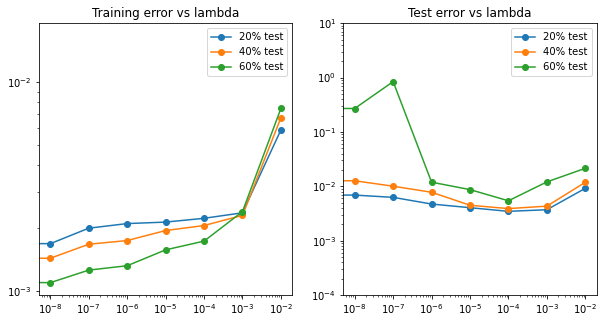

In [18]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1, 2, 1)
for j in range(len(tr)):
#  plt.errorbar(l,Etr[:,j],yerr=EtrSD[:,j],fmt='-o')
  plt.plot(l,Etr[:,j],'-o')
plt.title('Training error vs lambda')
plt.legend(['20% test','40% test','60% test'])
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2 = fig.add_subplot(1, 2, 2)
for j in range(len(tr)):
#  plt.errorbar(l,Ete[:,j],yerr=EteSD[:,j],fmt='-o')
  plt.plot(l,Ete[:,j],'-o')
plt.title('Test error vs lambda')
plt.legend(['20% test','40% test','60% test'])
ax2.set_xscale('log')
ax2.set_yscale('log')
plt.ylim((10**-4,10**1))

plt.show()


STEP 8: Analyzing *lambda* with different polynomial degrees


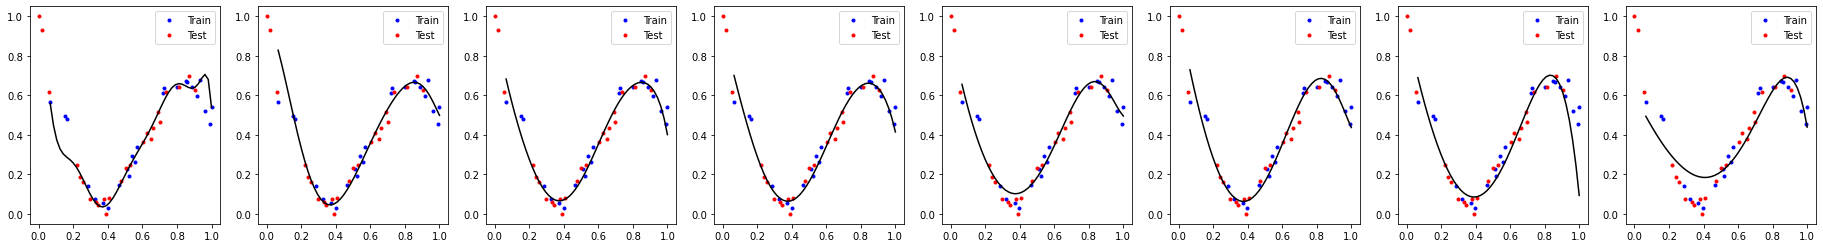

In [19]:
data = da.Data('P1_cubic.csv')
data.scale()
tr = 0.5
d = np.array([3,6,10])
l = np.array([0,10**(-8),10**(-7),10**(-6),10**(-5),10**(-4),10**(-3),10**(-2)])
iter = 100
Etr = np.zeros((len(l),len(d)))
Ete = np.zeros((len(l),len(d)))
EtrSD = np.zeros((len(l),len(d)))
EteSD = np.zeros((len(l),len(d)))

for j in range(len(d)):
  betaAUX = np.zeros((d[j]+1,len(l)))
  for i in range(len(l)): 
    auxtr = np.zeros((iter,))
    auxte = np.zeros((iter,))
    for k in range(iter):
      data.splitData(tr)
      _,Xtr,Ytr = buildmodel(data.Xtrain,d[j])
      _,Xte,Yte = buildmodel(data.Xtest,d[j])
      betaAUX[:,i]      = analyticL2regularized(Xtr,Ytr,l[i])
      auxtr[k],auxte[k] = computeErrors(betaAUX[:,i],Xtr,Ytr,Xte,Yte)
    Etr[i,j] = np.mean(auxtr)
    Ete[i,j] = np.mean(auxte)
    EtrSD[i,j] = np.std(auxtr)
    EteSD[i,j] = np.std(auxte)
plt.figure(figsize = (4*len(l),4))
for i in range(len(l)):
  plt.subplot(1,len(l),i+1)
  data.plotData()
  plotSolution(Xtr,betaAUX[:,i],d[-1])
plt.show()


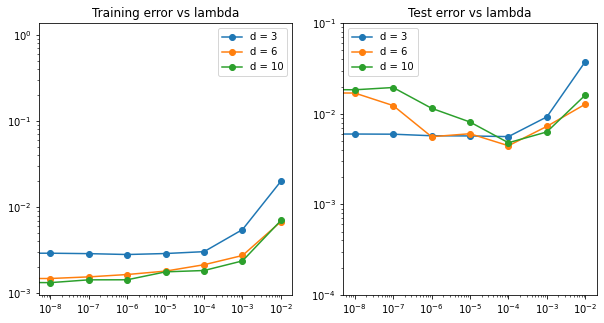

In [20]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1, 2, 1)
for j in range(len(d)):
#  plt.errorbar(l,Etr[:,j],yerr=EtrSD[:,j],fmt='-o')
  plt.plot(l,Etr[:,j],'-o')
plt.title('Training error vs lambda')
plt.legend(['d = 3','d = 6','d = 10'])
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2 = fig.add_subplot(1, 2, 2)
for j in range(len(d)):
#  plt.errorbar(l,Ete[:,j],yerr=EteSD[:,j],fmt='-o')
  plt.plot(l,Ete[:,j],'-o')
plt.title('Test error vs lambda')
plt.legend(['d = 3','d = 6','d = 10'])
ax2.set_xscale('log')
ax2.set_yscale('log')
plt.ylim((10**-4,10**-1))

plt.show()